# Introduction to Data Science Course Final Project

> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>

<br>

# Jupyter Notebook Number 2
<i>Python Programming</i>
<br>

<img src="images/progimages.jpg" width="90%" height="auto" align="left">

# Question 1:

In [1]:
# this to_binary_bases function gets a decimal number and print the number in binary, octal and hexadecimal bases
def to_binary_bases(num : int):
    print('base 2  (binary):',  bin(num)[2:])
    print('base 8  (octal):',  oct(num)[2:])
    print('base 16 (hexadecimal):', hex(num)[2:])
    
# example:
to_binary_bases(117)

base 2  (binary): 1110101
base 8  (octal): 165
base 16 (hexadecimal): 75


# Question 2:

In [2]:
import pandas as pd
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Section 1:

In [3]:
# How many movies have the title "Hamlet"?

# prints the number of 'Hamlet' in title feature:

# getting only the films with title of 'Hamlet'
title_hamlet = cast.loc[cast['title'] == 'Hamlet']

# droping all the duplicates by year, assuming that every year there is only one film
title_hamlet_films = title_hamlet.drop_duplicates(subset='year',keep='first')

# get and print the count of movise
title_hamlet_count = title_hamlet_films.shape[0]
print('Number of movies with the title \'Hamlet\' is {}'.format(title_hamlet_count))

Number of movies with the title 'Hamlet' is 17


### Section 2:

In [4]:
# list all of the "Treasure Island" movies from earliest to most recent.

# get only the 'Treasure Island' value in title in cast data frame:
title_treasure_island = cast.loc[cast['title'] == 'Treasure Island']

# first, droping all the duplicates by year, assuming that every year there is only one film
title_treasure_island_films = title_treasure_island.drop_duplicates(subset='year',keep='first')

# sorting by year and show it:
title_treasure_island_films.sort_values(by=['year'])

,title,year,name,type,character,n
313097,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0
345942,Treasure Island,1920,Lon Chaney,actor,Blind Pew,5.0
8570,Treasure Island,1934,Robert Adair,actor,Tom - Seaman,NaN
12141,Treasure Island,1950,Chris Adcock,actor,Pike,26.0
38151,Treasure Island,1972,Cristino Almod?var,actor,O'Brien,18.0
484325,Treasure Island,1973,Richard Dawson,actor,Long John Silver,1.0
14899,Treasure Island,1985,Yves Afonso,actor,French captain,8.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


### Section 3:

In [5]:
# How many roles were credited in the silent 1921 version of Hamlet?

# create another data frame called halmet that will contains only halmet flims
hamlet = cast.loc[cast['title'] == 'Hamlet']

# create another data frame called hamlet_year that will contains only halmet flims from 1921
hamlet_year = hamlet.loc[cast['year'] == 1921]

# print the len of the cast in the 1921 halmet flim and get 9
len(hamlet_year)

9

### Section 4:

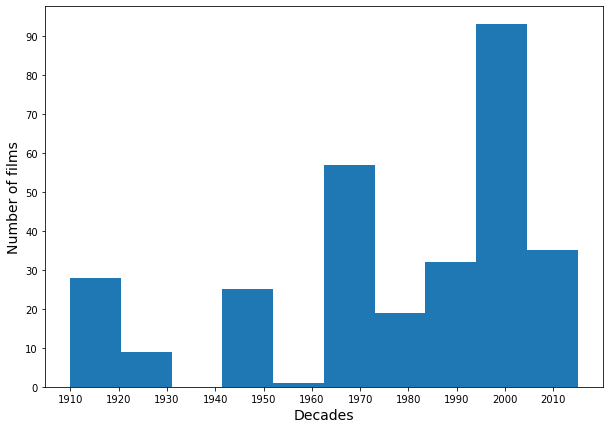

In [6]:
# Use groupby() to plot the number of "Hamlet" films made each decade
# import matplotlib fot ploting
import matplotlib.pyplot as plt
%matplotlib inline

# import numpy for arange x and y axis numbers
import numpy as np

# graph size
plt.figure(figsize=(10, 7))

# change x axis number seperate in decades: [1910 - 2020]
plt.xticks(np.arange(1910, 2020, 10), fontsize=10)

# change y axis number to bet between 0 and 100 with steps of 10
plt.yticks(np.arange(0, 100, 10))

# using group by only to get the flims with the title of 'Hamlet' group by the 'year' feature
plt.hist(cast.loc[cast['title'] == 'Hamlet']['year'])

# change lables
plt.xlabel('Decades', fontsize=14)
plt.ylabel('Number of films', fontsize=14)

# plot
plt.show()

### Section 5:

In [7]:
# How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
n_actors = cast['n'].eq(1).sum()

# getting from cast dataframe only the flims from the fifties, between years 1950 and 1959
fifties = cast.loc[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# seperate the fifties to two types: type actor and type actress
fifties_actor = fifties.loc[cast['type'] == 'actor']
fifties_actress = fifties.loc[cast['type'] == 'actress']

# for each data frame by type from the fifties, separate to two more data frames only with leading (n=1) roles

# fifties_actor_n - only flims in the 1950s, by type actor and n=1
fifties_actor_n = fifties_actor.loc[cast['n'] == 1]

# fifties_actor_n - only flims in the 1950s, by type actress and n=1
fifties_actress_n = fifties_actress.loc[cast['n'] == 1]

# for each data frame take the sun of it
fifties_actor_n_sum = fifties_actor_n.groupby('year').sum()
fifties_actress_n_sum = fifties_actress_n.groupby('year').sum()

# print for actors the sum
print('actors:')
first = 1950
for i in fifties_actor_n_sum['n']:
    print('\tyear: {}, sum: {}'.format(first, i))
    first += 1
    
# print for actresses the sum
print('\nactresses:')
first = 1950
for i in fifties_actress_n_sum['n']:
    print('\tyear: {}, sum: {}'.format(first, i))
    first += 1

actors:
	year: 1950, sum: 604.0
	year: 1951, sum: 633.0
	year: 1952, sum: 591.0
	year: 1953, sum: 634.0
	year: 1954, sum: 626.0
	year: 1955, sum: 606.0
	year: 1956, sum: 614.0
	year: 1957, sum: 708.0
	year: 1958, sum: 694.0
	year: 1959, sum: 678.0

actresses:
	year: 1950, sum: 271.0
	year: 1951, sum: 272.0
	year: 1952, sum: 284.0
	year: 1953, sum: 290.0
	year: 1954, sum: 298.0
	year: 1955, sum: 264.0
	year: 1956, sum: 288.0
	year: 1957, sum: 284.0
	year: 1958, sum: 275.0
	year: 1959, sum: 287.0


### Section 6:

In [8]:
# List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

# create another data frame called ninety that will constains only the flime since 1990's
ninety = cast.loc[(cast['year'] >= 1990)]

ninety_n = cast.loc[(cast['n'] == 1)]

ninety_n.groupby('name').sum()

,year,n
name,,
'Chiyaan' Vikram,50165,25.0
'Cowboy' Matt Hopewell,2012,1.0
'Karloff' Lagarde,3932,2.0
'Little Billy' Rhodes,1926,1.0
'Pook Diesel' Paul Watson,2007,1.0
...,...,...
Zygmunt H?bner,1967,1.0
Zygmunt Kestowicz,3915,2.0
Zygmunt Malanowicz,9872,5.0
